Taking the first and second order derivatives of MFCCs can be a good idea in some cases, as it can capture temporal changes in the signal and provide more information about the dynamics of the sound. The first derivative measures the rate of change of the MFCCs, and the second derivative measures the acceleration of that rate of change.

However, it is important to note that taking derivatives can also introduce noise and artifacts, especially if the signal is noisy or the analysis window is not well aligned with the signal. Additionally, higher order derivatives may not always provide useful information, as the signal may become too distorted or too sensitive to small changes in the signal.

Therefore, it is generally recommended to experiment with different feature sets, including different combinations of MFCCs and their derivatives, to see what works best for your specific application. It may also be helpful to preprocess the data with techniques like smoothing or filtering to remove noise and artifacts before taking derivatives.

Other = 3, Biophony = 2, Anthrophony = 1 (completely missed the mark on this), Geophony = 0

There are several metrics that can be used to evaluate the performance of k-means clusters. Some common evaluation metrics are:

Silhouette Score: It measures the similarity of each sample to its own cluster compared to other clusters. It ranges from -1 to 1, with a higher value indicating a better cluster assignment.

Calinski-Harabasz Index: It measures the ratio of the between-cluster variance to the within-cluster variance. Higher values indicate better cluster solutions.

Davies-Bouldin Index: It measures the average similarity between each cluster and its most similar cluster. Lower values indicate better cluster solutions.

Adjusted Rand Index: It measures the similarity between the true labels and the predicted labels. A value of 1 indicates a perfect match between the true labels and the predicted labels, while a value close to 0 indicates a poor match.

Confusion Matrix: It is a table showing the number of samples that have been correctly or incorrectly classified into each cluster.

V-measure: It is a combination of the homogeneity and completeness of the clustering solution, where homogeneity refers to the degree to which the samples within a cluster are similar to each other and completeness refers to the degree to which the samples from a single class are assigned to the same cluster.

These metrics can be computed using Python libraries such as scikit-learn or Numpy. The choice of evaluation metric may depend on the specific problem and the desired properties of the clustering solution.

Using sci-kit learn 

In [216]:
import pandas as pd
data = pd.read_csv("39-feature-vector.csv")
data

,class,0,1,2,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,38
0,anthrophony,0.626714,0.827684,0.930313,0.501803,0.542249,0.468979,0.318348,0.379219,0.426658,...,0.070683,0.079686,0.085407,0.084761,0.075187,0.072029,0.073790,0.079146,0.084986,0.092545
1,anthrophony,0.461087,0.744750,0.883125,0.514840,0.533231,0.482730,0.353830,0.435641,0.525935,...,0.128797,0.128452,0.136328,0.137922,0.135077,0.131882,0.124851,0.128193,0.128049,0.129284
2,anthrophony,0.390126,0.682046,0.955433,0.424473,0.592745,0.418916,0.387924,0.392779,0.492717,...,0.140188,0.133408,0.141130,0.136032,0.134554,0.134804,0.134235,0.133575,0.133459,0.136899
3,anthrophony,0.664164,0.821859,1.000000,0.475881,0.561929,0.409417,0.350974,0.338424,0.422630,...,0.041718,0.041547,0.050154,0.044924,0.036704,0.034917,0.036167,0.037872,0.044116,0.047740
4,anthrophony,0.359122,0.657137,0.954445,0.442800,0.623291,0.419816,0.392054,0.391199,0.492590,...,0.124112,0.118943,0.126383,0.119483,0.116559,0.116601,0.116413,0.116972,0.119721,0.124027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6599,other,0.230966,0.569598,0.795762,0.554628,0.642260,0.591072,0.436866,0.547585,0.436631,...,0.101700,0.102209,0.105817,0.106501,0.095956,0.095646,0.096040,0.097561,0.101006,0.108054
6600,other,0.222576,0.571416,0.786815,0.554614,0.633529,0.569845,0.417258,0.526320,0.420969,...,0.148462,0.142680,0.144562,0.144662,0.132111,0.130482,0.134250,0.131713,0.133691,0.141131
6601,other,0.207785,0.558981,0.778578,0.544905,0.638189,0.579981,0.426273,0.544027,0.418871,...,0.141598,0.142239,0.146732,0.144848,0.145634,0.149111,0.144374,0.145140,0.145477,0.149187
6602,other,0.179243,0.538048,0.772647,0.538000,0.643699,0.573222,0.414198,0.501620,0.419401,...,0.196654,0.193573,0.197527,0.198125,0.191823,0.195113,0.193040,0.195639,0.190391,0.202831


In [217]:
from sklearn import metrics
#encoding class values
data['class'] = data['class'].str.replace('other', str(3))
data['class'] = data['class'].str.replace('biophony', str(2))
data['class'] = data['class'].str.replace('geophony', str(0))
data['class'] = data['class'].str.replace('anthrophony', str(1))


In [218]:
features = data.iloc[:, 1:39].values
labels_true = data["class"]

In [205]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import adjusted_rand_score
import numpy as np
import pandas as pd

# Initialize KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4)

# Compute pairwise cosine distances between all data points
distances = cosine_distances(features)

# Fit the model to the data using cosine distances
kmeans.fit(features, y=None, sample_weight=None)

# Predict the cluster labels for the data
labels_pred = kmeans.predict(features)

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Get the inertia of the clusters (total within-cluster sum of squares)
inertia = kmeans.inertia_

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=26.
  warnings.warn(


Compute performance metrics (comparing GT labels (labels_true) to predicted labels (labels_pred))

In [6]:
metrics.rand_score(labels_true, labels_pred)

0.6960454166484353

In [7]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.25131847506442134

In [8]:
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

0.2847693589454632

In [9]:
metrics.homogeneity_score(labels_true, labels_pred)

0.29140965202971825

In [10]:
metrics.completeness_score(labels_true, labels_pred)

0.2791382845416045

In [11]:
metrics.v_measure_score(labels_true, labels_pred)

0.28514200175806925

In [12]:
metrics.fowlkes_mallows_score(labels_true, labels_pred)

0.4631624423524277

Hierarchical clustering

In [98]:
from sklearn.cluster import AgglomerativeClustering

single_linkage = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
labels_pred = single_linkage.fit_predict(features)


In [186]:
metrics.rand_score(labels_true, labels_pred)

0.40338812277480096

In [187]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.01692012347103161

In [188]:
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

0.1416205920718665

In [189]:
metrics.homogeneity_score(labels_true, labels_pred)

0.09824810255466684

In [190]:
metrics.completeness_score(labels_true, labels_pred)

0.2580026776427552

In [191]:
metrics.v_measure_score(labels_true, labels_pred)

0.14230578537050173

In [192]:
metrics.fowlkes_mallows_score(labels_true, labels_pred)

0.48314026080142586

In [21]:
%pip install pyclustering


Note: you may need to restart the kernel to use updated packages.


In [206]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [207]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

In [219]:
print(purity_score(labels_true, labels_pred))

0.6069049061175046


In [220]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}
X = features
y = labels_true

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 4, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    print(f"Rand-score for {dist_measure} is {round(metrics.rand_score(y, pyLabels)*100, 2)}%")
    print(f"Adj-Rand-score for {dist_measure} is {round(metrics.adjusted_rand_score(y, pyLabels)*100, 2)}%")
    print(f"Adj-Mutual-score for {dist_measure} is {round(metrics.adjusted_mutual_info_score(y, pyLabels)*100, 2)}%")
    print(f"Homogeneity-score for {dist_measure} is {round(metrics.homogeneity_score(y, pyLabels)*100, 2)}%")
    print(f"Completeness-score for {dist_measure} is {round(metrics.completeness_score(y, pyLabels)*100, 2)}%")
    print(f"V-measure-score for {dist_measure} is {round(metrics.v_measure_score(y, pyLabels)*100, 2)}%")
    print(f"Fowlkes-mallows-score for {dist_measure} is {round(metrics.fowlkes_mallows_score(y, pyLabels)*100, 2)}%")
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")
    print(" ")

Rand-score for 0 is 69.78%
Adj-Rand-score for 0 is 25.26%
Adj-Mutual-score for 0 is 28.68%
Homogeneity-score for 0 is 29.45%
Completeness-score for 0 is 28.02%
V-measure-score for 0 is 28.71%
Fowlkes-mallows-score for 0 is 46.26%
The purity score for euclidean distance is 59.9%
 
Rand-score for 1 is 70.15%
Adj-Rand-score for 1 is 25.72%
Adj-Mutual-score for 1 is 29.07%
Homogeneity-score for 1 is 30.01%
Completeness-score for 1 is 28.25%
V-measure-score for 1 is 29.1%
Fowlkes-mallows-score for 1 is 46.38%
The purity score for squared euclidean distance is 59.86%
 
Rand-score for 2 is 69.6%
Adj-Rand-score for 2 is 25.52%
Adj-Mutual-score for 2 is 28.67%
Homogeneity-score for 2 is 29.21%
Completeness-score for 2 is 28.23%
V-measure-score for 2 is 28.71%
Fowlkes-mallows-score for 2 is 46.79%
The purity score for manhattan distance is 61.95%
 
Rand-score for 3 is 67.09%
Adj-Rand-score for 3 is 24.63%
Adj-Mutual-score for 3 is 28.41%
Homogeneity-score for 3 is 27.07%
Completeness-score for 3

Correlation analysis for dimension reduction

Pearson's correlation: The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples.

Spearman's rank correlation: It is a non-parametric method that measures the monotonic relationship between two variables.

Kendall's tau correlation: It is another non-parametric method that measures the ordinal association between two variables.

Mutual Information: It measures the mutual dependence between two variables and is commonly used for feature selection in machine learning problems.

Distance Correlation: It is a distance-based measure of dependence between two variables and is able to detect non-linear relationships between variables.

Heteroscedasticity-consistent Correlation: It is a modification of Pearson's correlation that corrects for heteroscedasticity, which is the presence of non-constant variance in the errors.

You can use these other correlation methods in Python similarly to Pearson's correlation, by using the appropriate function from libraries such as scipy or pandas.

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif

# Load the data into a pandas DataFrame
df = pd.read_csv("39-feature-vector.csv")
from sklearn import metrics
#encoding class values
df = df.drop(columns=["class"])
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.626714,0.827684,0.930313,0.501803,0.542249,0.468979,0.318348,0.379219,0.426658,0.446274,...,0.070683,0.079686,0.085407,0.084761,0.075187,0.072029,0.073790,0.079146,0.084986,0.092545
1,0.461087,0.744750,0.883125,0.514840,0.533231,0.482730,0.353830,0.435641,0.525935,0.468374,...,0.128797,0.128452,0.136328,0.137922,0.135077,0.131882,0.124851,0.128193,0.128049,0.129284
2,0.390126,0.682046,0.955433,0.424473,0.592745,0.418916,0.387924,0.392779,0.492717,0.520399,...,0.140188,0.133408,0.141130,0.136032,0.134554,0.134804,0.134235,0.133575,0.133459,0.136899
3,0.664164,0.821859,1.000000,0.475881,0.561929,0.409417,0.350974,0.338424,0.422630,0.434366,...,0.041718,0.041547,0.050154,0.044924,0.036704,0.034917,0.036167,0.037872,0.044116,0.047740
4,0.359122,0.657137,0.954445,0.442800,0.623291,0.419816,0.392054,0.391199,0.492590,0.518938,...,0.124112,0.118943,0.126383,0.119483,0.116559,0.116601,0.116413,0.116972,0.119721,0.124027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6599,0.230966,0.569598,0.795762,0.554628,0.642260,0.591072,0.436866,0.547585,0.436631,0.568266,...,0.101700,0.102209,0.105817,0.106501,0.095956,0.095646,0.096040,0.097561,0.101006,0.108054
6600,0.222576,0.571416,0.786815,0.554614,0.633529,0.569845,0.417258,0.526320,0.420969,0.575521,...,0.148462,0.142680,0.144562,0.144662,0.132111,0.130482,0.134250,0.131713,0.133691,0.141131
6601,0.207785,0.558981,0.778578,0.544905,0.638189,0.579981,0.426273,0.544027,0.418871,0.558798,...,0.141598,0.142239,0.146732,0.144848,0.145634,0.149111,0.144374,0.145140,0.145477,0.149187
6602,0.179243,0.538048,0.772647,0.538000,0.643699,0.573222,0.414198,0.501620,0.419401,0.559814,...,0.196654,0.193573,0.197527,0.198125,0.191823,0.195113,0.193040,0.195639,0.190391,0.202831


Visualising potential relationships or correlations amongst the different data attributes leveraging a pair-wise correlation matrix depicted as a heatmap.

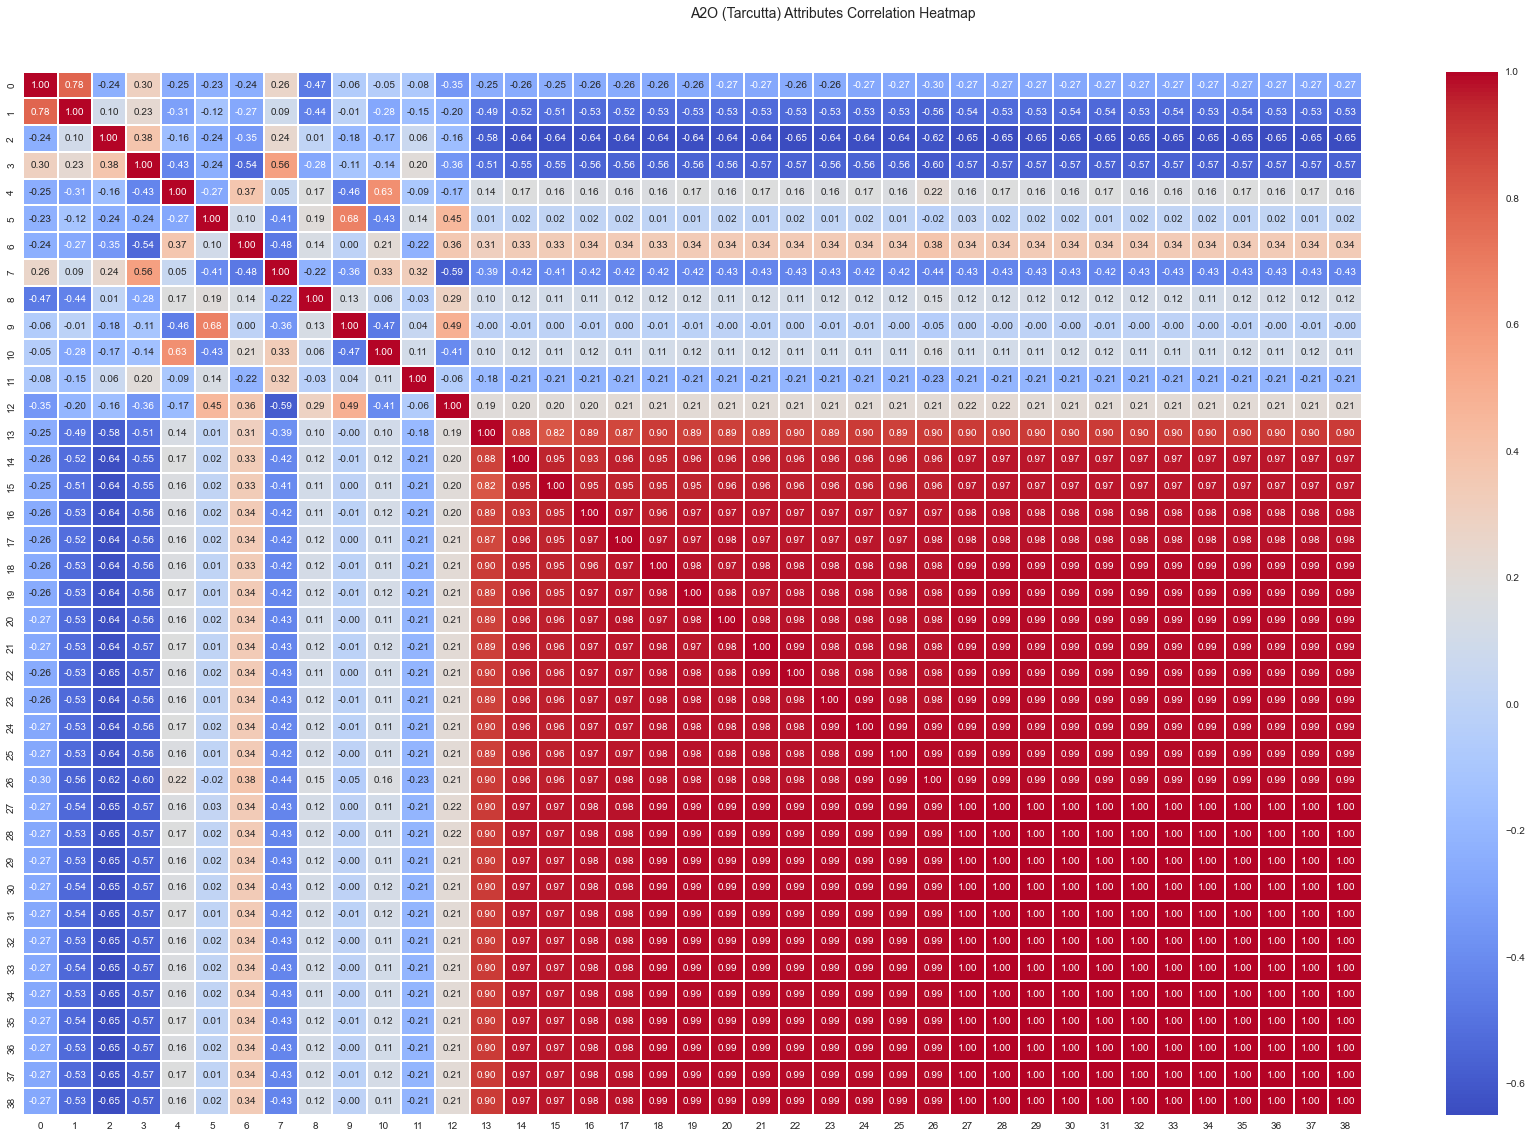

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(30, 18))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('A2O (Tarcutta) Attributes Correlation Heatmap', fontsize=14)

In [27]:



# # Scaling attribute values to avoid few outiers
# cols = ['0', '1', '2', '3', '4', '5', 
#         '6', '7', '8', '9', '10',
#         '11', '12', '13', '14', '15',
#         '16', '17', '18', '19', '20',
#         '21', '22', '23', '24', '25',
#         '26', '27', '28', '29', '30',
#         '31', '32', '33', '34', '35',
#         '36', '37', '38']
# subset_df = df[cols]

# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()

# scaled_df = ss.fit_transform(subset_df)
# scaled_df = pd.DataFrame(scaled_df, columns=cols)

# # plot parallel coordinates
# from pandas.plotting import parallel_coordinates
# pc = parallel_coordinates(scaled_df, 'class', color=('#FFE888', '#FF9999'))

Dropping all columns except for 13->38

In [35]:
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.626714,0.827684,0.930313,0.501803,0.542249,0.468979,0.318348,0.379219,0.426658,0.446274,...,0.070683,0.079686,0.085407,0.084761,0.075187,0.072029,0.073790,0.079146,0.084986,0.092545
1,0.461087,0.744750,0.883125,0.514840,0.533231,0.482730,0.353830,0.435641,0.525935,0.468374,...,0.128797,0.128452,0.136328,0.137922,0.135077,0.131882,0.124851,0.128193,0.128049,0.129284
2,0.390126,0.682046,0.955433,0.424473,0.592745,0.418916,0.387924,0.392779,0.492717,0.520399,...,0.140188,0.133408,0.141130,0.136032,0.134554,0.134804,0.134235,0.133575,0.133459,0.136899
3,0.664164,0.821859,1.000000,0.475881,0.561929,0.409417,0.350974,0.338424,0.422630,0.434366,...,0.041718,0.041547,0.050154,0.044924,0.036704,0.034917,0.036167,0.037872,0.044116,0.047740
4,0.359122,0.657137,0.954445,0.442800,0.623291,0.419816,0.392054,0.391199,0.492590,0.518938,...,0.124112,0.118943,0.126383,0.119483,0.116559,0.116601,0.116413,0.116972,0.119721,0.124027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6599,0.230966,0.569598,0.795762,0.554628,0.642260,0.591072,0.436866,0.547585,0.436631,0.568266,...,0.101700,0.102209,0.105817,0.106501,0.095956,0.095646,0.096040,0.097561,0.101006,0.108054
6600,0.222576,0.571416,0.786815,0.554614,0.633529,0.569845,0.417258,0.526320,0.420969,0.575521,...,0.148462,0.142680,0.144562,0.144662,0.132111,0.130482,0.134250,0.131713,0.133691,0.141131
6601,0.207785,0.558981,0.778578,0.544905,0.638189,0.579981,0.426273,0.544027,0.418871,0.558798,...,0.141598,0.142239,0.146732,0.144848,0.145634,0.149111,0.144374,0.145140,0.145477,0.149187
6602,0.179243,0.538048,0.772647,0.538000,0.643699,0.573222,0.414198,0.501620,0.419401,0.559814,...,0.196654,0.193573,0.197527,0.198125,0.191823,0.195113,0.193040,0.195639,0.190391,0.202831


In [221]:
features = df.iloc[:, 0:26].values
features

array([[0.62671421, 0.82768447, 0.93031283, ..., 0.06764889, 0.05300424,
        0.06074119],
       [0.46108699, 0.74474971, 0.88312501, ..., 0.12099199, 0.0967254 ,
        0.11658139],
       [0.39012605, 0.68204556, 0.95543333, ..., 0.15092679, 0.13604166,
        0.15137188],
       ...,
       [0.20778486, 0.55898113, 0.77857836, ..., 0.16320212, 0.12489843,
        0.13821781],
       [0.17924338, 0.53804847, 0.77264731, ..., 0.2098052 , 0.20743406,
        0.20971912],
       [0.1599984 , 0.52326411, 0.78125392, ..., 0.21926999, 0.20320177,
        0.19971311]])

In [133]:
from sklearn.cluster import AgglomerativeClustering

single_linkage = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
labels_pred = single_linkage.fit_predict(features)

In [222]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}
X = features
y = labels_true

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 4, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    print(f"Rand-score for {dist_measure} is {round(metrics.rand_score(y, pyLabels)*100, 2)}%")
    print(f"Adj-Rand-score for {dist_measure} is {round(metrics.adjusted_rand_score(y, pyLabels)*100, 2)}%")
    print(f"Adj-Mutual-score for {dist_measure} is {round(metrics.adjusted_mutual_info_score(y, pyLabels)*100, 2)}%")
    print(f"Homogeneity-score for {dist_measure} is {round(metrics.homogeneity_score(y, pyLabels)*100, 2)}%")
    print(f"Completeness-score for {dist_measure} is {round(metrics.completeness_score(y, pyLabels)*100, 2)}%")
    print(f"V-measure-score for {dist_measure} is {round(metrics.v_measure_score(y, pyLabels)*100, 2)}%")
    print(f"Fowlkes-mallows-score for {dist_measure} is {round(metrics.fowlkes_mallows_score(y, pyLabels)*100, 2)}%")
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")
    print(" ")

Rand-score for 0 is 69.87%
Adj-Rand-score for 0 is 29.71%
Adj-Mutual-score for 0 is 34.52%
Homogeneity-score for 0 is 33.36%
Completeness-score for 0 is 35.84%
V-measure-score for 0 is 34.56%
Fowlkes-mallows-score for 0 is 51.54%
The purity score for euclidean distance is 65.19%
 
Rand-score for 1 is 71.66%
Adj-Rand-score for 1 is 30.49%
Adj-Mutual-score for 1 is 32.44%
Homogeneity-score for 1 is 33.12%
Completeness-score for 1 is 31.86%
V-measure-score for 1 is 32.47%
Fowlkes-mallows-score for 1 is 50.31%
The purity score for squared euclidean distance is 64.87%
 
Rand-score for 2 is 69.89%
Adj-Rand-score for 2 is 25.6%
Adj-Mutual-score for 2 is 28.93%
Homogeneity-score for 2 is 29.69%
Completeness-score for 2 is 28.28%
V-measure-score for 2 is 28.97%
Fowlkes-mallows-score for 2 is 46.54%
The purity score for manhattan distance is 60.72%
 
Rand-score for 3 is 66.96%
Adj-Rand-score for 3 is 24.43%
Adj-Mutual-score for 3 is 28.27%
Homogeneity-score for 3 is 26.92%
Completeness-score for

In [209]:
from sklearn.decomposition import PCA

Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

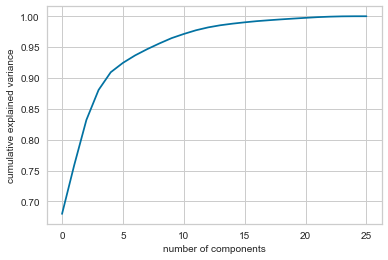

In [210]:
pca = PCA().fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Here we can see that 2-3 components explains 90% of the variance

In [211]:
pca = PCA(7)  # project from 39 to 2 dimensions
projected = pca.fit_transform(features)
print(features.shape)
print(projected.shape)

(6604, 26)
(6604, 7)


In [185]:
from sklearn.cluster import AgglomerativeClustering

single_linkage = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
labels_pred = single_linkage.fit_predict(projected)

In [212]:
y = data.iloc[:, 0].values

In [213]:
print(type(y))

<class 'numpy.ndarray'>


In [214]:
y = y.astype(int)

In [51]:
# # Create a colormap based on the unique values in y
# from matplotlib.colors import ListedColormap
# cmap = ListedColormap(['r', 'g', 'b', 'y'])
# norm = plt.Normalize(min(y), max(y))

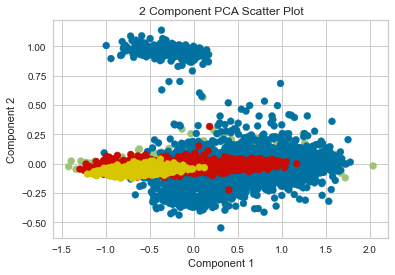

In [52]:
# # Create a scatter plot of the two principal components
# plt.scatter(projected[:,0], projected[:,1], c=y, cmap=cmap, norm=norm)
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.title('2 Component PCA Scatter Plot')
# plt.show()

In [215]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}
X = projected
y = labels_true

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 4, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    print(f"Rand-score for {dist_measure} is {round(metrics.rand_score(y, pyLabels)*100, 2)}%")
    print(f"Adj-Rand-score for {dist_measure} is {round(metrics.adjusted_rand_score(y, pyLabels)*100, 2)}%")
    print(f"Adj-Mutual-score for {dist_measure} is {round(metrics.adjusted_mutual_info_score(y, pyLabels)*100, 2)}%")
    print(f"Homogeneity-score for {dist_measure} is {round(metrics.homogeneity_score(y, pyLabels)*100, 2)}%")
    print(f"Completeness-score for {dist_measure} is {round(metrics.completeness_score(y, pyLabels)*100, 2)}%")
    print(f"V-measure-score for {dist_measure} is {round(metrics.v_measure_score(y, pyLabels)*100, 2)}%")
    print(f"Fowlkes-mallows-score for {dist_measure} is {round(metrics.fowlkes_mallows_score(y, pyLabels)*100, 2)}%")
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")
    print(" ")

Rand-score for 0 is 69.86%
Adj-Rand-score for 0 is 29.69%
Adj-Mutual-score for 0 is 34.48%
Homogeneity-score for 0 is 33.32%
Completeness-score for 0 is 35.8%
V-measure-score for 0 is 34.51%
Fowlkes-mallows-score for 0 is 51.52%
The purity score for euclidean distance is 65.19%
 
Rand-score for 1 is 71.63%
Adj-Rand-score for 1 is 30.36%
Adj-Mutual-score for 1 is 32.3%
Homogeneity-score for 1 is 33.0%
Completeness-score for 1 is 31.7%
V-measure-score for 1 is 32.34%
Fowlkes-mallows-score for 1 is 50.18%
The purity score for squared euclidean distance is 64.73%
 
Rand-score for 2 is 71.34%
Adj-Rand-score for 2 is 29.3%
Adj-Mutual-score for 2 is 30.69%
Homogeneity-score for 2 is 31.5%
Completeness-score for 2 is 29.99%
V-measure-score for 2 is 30.73%
Fowlkes-mallows-score for 2 is 49.26%
The purity score for manhattan distance is 65.69%
 
Rand-score for 3 is 71.45%
Adj-Rand-score for 3 is 30.12%
Adj-Mutual-score for 3 is 31.96%
Homogeneity-score for 3 is 32.55%
Completeness-score for 3 is

MDS 

Multidimensional scaling maps points residing in a higher-dimensional space to a lower-dimensional space while preserving the distances between those points as much as possible. Because of this, the pairwise distances between points in the lower-dimensional space are matched closely to their actual distances.

In [40]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [41]:
dist_euclid = euclidean_distances(features)
dist_euclid.shape

(6604, 6604)

In [42]:
stress = []
# Max value for n_components
max_range = 21
for dim in range(1, max_range):
    # Set up the MDS object
    mds = MDS(n_components=dim, dissimilarity='precomputed', random_state=0)
    # Apply MDS
    pts = mds.fit_transform(dist_euclid)
    # Retrieve the stress value
    stress.append(mds.stress_)
# Plot stress vs. n_components    
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()

KeyboardInterrupt: 

In [ ]:
def mapData(dist_matrix, X, y, metric, title):
    mds = MDS(metric=metric, dissimilarity='precomputed', random_state=0)
    # Get the embeddings
    pts = mds.fit_transform(dist_matrix)
    # Plot the embedding, colored according to the class of the points
    fig = plt.figure(2, (15,6))
    ax = fig.add_subplot(1,2,1)    
    ax = sns.scatterplot(x=pts[:, 0], y=pts[:, 1],
                         hue=y, palette=['r', 'g', 'b', 'c'])

    # Add the second plot
    ax = fig.add_subplot(1,2,2)
    # Plot the points again
    plt.scatter(pts[:, 0], pts[:, 1])
    
    # Annotate each point by its corresponding face image
    for x, ind in zip(X, range(pts.shape[0])):
        im = x.reshape(64,64)
        imagebox = OffsetImage(im, zoom=0.3, cmap=plt.cm.gray)
        i = pts[ind, 0]
        j = pts[ind, 1]
        ab = AnnotationBbox(imagebox, (i, j), frameon=False)
        ax.add_artist(ab)
    plt.title(title)    
    plt.show()

In [ ]:
mapData(dist_euclid, features, labels_true, True, 
        'Metric MDS with Euclidean')

KeyboardInterrupt: 

In [ ]:
### Step 1 - Configure MDS function, note we use default hyperparameter values for this example
model2d=MDS(n_components=2, 
          metric=True, 
          n_init=4, 
          max_iter=300, 
          verbose=0, 
          eps=0.001, 
          n_jobs=None, 
          random_state=42, 
          dissimilarity='euclidean')

### Step 2 - Fit the data and transform it, so we have 2 dimensions instead of 3
X_trans = model2d.fit_transform(features)
    
### Step 3 - Print a few stats
print('The new shape of X: ',X_trans.shape)
print('No. of Iterations: ', model2d.n_iter_)
print('Stress: ', model2d.stress_)

# Dissimilarity matrix contains distances between data points in the original high-dimensional space
#print('Dissimilarity Matrix: ', model2d.dissimilarity_matrix_)
# Embedding contains coordinates for data points in the new lower-dimensional space
#print('Embedding: ', model2d.embedding_)

The new shape of X:  (6604, 2)
No. of Iterations:  300
Stress:  362488.7123611544
